# Compute cycles

We just need some cycles, it doesn't have to be so hard.

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import numpy as np
import dionysus
from sklearn import datasets
import matplotlib.pyplot as plt

from ripser import Rips

from src.cycler import Cycler

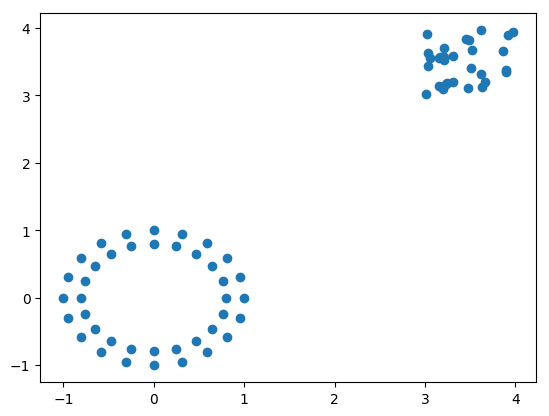

In [21]:
data, labels = datasets.make_circles(40)
data = np.concatenate([data,np.random.random((30,2))+3])

xs, ys = data[:,0], data[:,1]
plt.scatter(xs, ys)
plt.show()

# Construct filtration

In [22]:
# Generate persistence diagram 
cycler = Cycler()
cycler.fit(data)

# Get top interval
longest = cycler.longest_intervals(1)[0]
cycle = cycler.get_cycle(longest)

vertices = cycler.order_vertices(cycle)

# Visualize raw cycle

Rips(maxdim=1, thres=-1, coef=2, verbose=True)


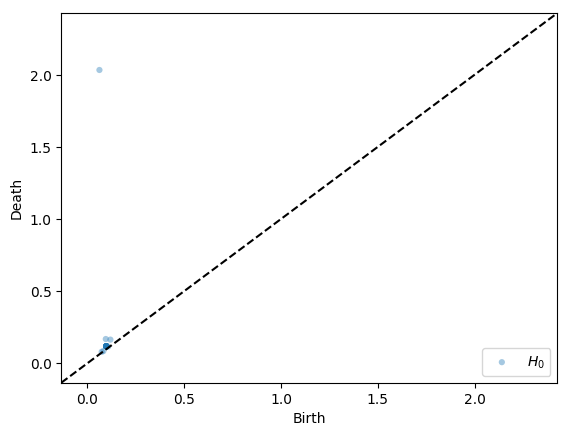

In [23]:
# Plot persistence diagram
rips = Rips()
rips.plot(cycler.barcode, alpha=0.4, jitter=False)

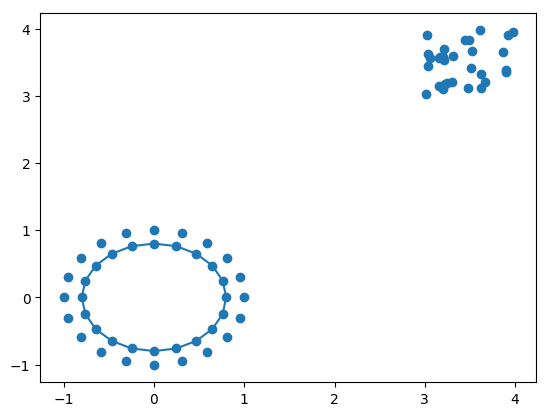

In [24]:
# Plot cycle
xs_v, ys_v = data[vertices][:,0], data[vertices][:,1]
plt.plot(xs_v, ys_v)

# Plot data
xs, ys = data[:,0], data[:,1]
plt.scatter(xs, ys)
plt.show()

# Show the top few cycles

In [27]:
# Generate persistence diagram 
cycler = Cycler()
cycler.fit(data)

top_intervals = cycler.longest_intervals(3)
cycles = [cycler.get_cycle(interval) for interval in top_intervals]

# cycle = cycler.data_representation_of_cycle(best_cycle)
vertex_sets = [cycler.order_vertices(cycle) for cycle in cycles]

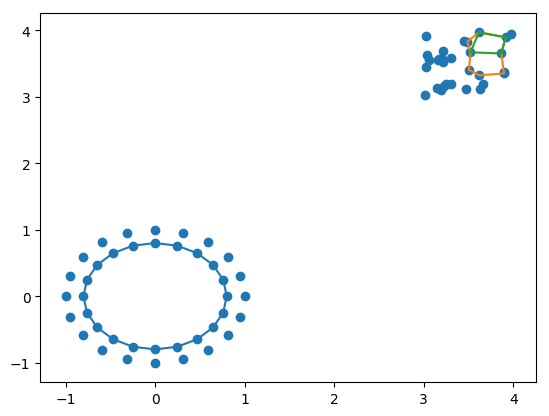

In [28]:
# Plot cycle
for vertices in vertex_sets:
    xs_v, ys_v = data[vertices][:,0], data[vertices][:,1]
    plt.plot(xs_v, ys_v)

# Plot data
xs, ys = data[:,0], data[:,1]
plt.scatter(xs, ys)
plt.show()

In [30]:
type(top_intervals[0])

dionysus._dionysus.DiagramPoint